In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [74]:
data = pd.read_csv('DataScienceJobs_cleaned.csv')

In [75]:
data.columns

Index(['Unnamed: 0', 'Job_title', 'Salary_estimate', 'Job_Description',
       'Rating', 'company_name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'same_state', 'python',
       'SQL', 'Spark', 'AWS', 'POWERBI', 'Excel', 'R_studio', 'matlab',
       'Tableau'],
      dtype='object')

In [76]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'Data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'NaN'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [77]:
data['job_simplified'] = data['Job_title'].apply(title_simplifier)

In [78]:
data['job_simplified'].value_counts()

data scientist    279
NaN               184
data engineer     119
Data analyst      102
manager            22
mle                22
director           14
Name: job_simplified, dtype: int64

In [79]:
data['level'] = data['Job_title'].apply(seniority)
data.rename({'level': 'Job_level'}, inplace=True, axis=1)
data.columns

Index(['Unnamed: 0', 'Job_title', 'Salary_estimate', 'Job_Description',
       'Rating', 'company_name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'same_state', 'python',
       'SQL', 'Spark', 'AWS', 'POWERBI', 'Excel', 'R_studio', 'matlab',
       'Tableau', 'job_simplified', 'Job_level'],
      dtype='object')

In [80]:
#Removing los angeles from the job state column
data.job_state = data.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
data.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [81]:
#creating a job description column count
data['Job_desc_count'] = data['Job_Description'].apply(lambda x: len(x))
data.head()

,Unnamed: 0,Job_title,Salary_estimate,Job_Description,Rating,company_name,Location,Headquarters,Size,Founded,...,Spark,AWS,POWERBI,Excel,R_studio,matlab,Tableau,job_simplified,Job_level,Job_desc_count
0,0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,0,0,0,1,0,1,1,data scientist,na,2555
1,1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,0,0,0,0,0,0,data scientist,na,4828
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,1,0,0,1,0,0,0,data scientist,na,3495
3,3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,0,0,0,0,0,0,0,data scientist,na,3926
4,4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,0,0,0,1,0,0,0,data scientist,na,2748


In [82]:
#Getting the annual salary for jobs with per hour pay rate
data['min_salary'] = data.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
data['max_salary'] = data.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)
data[data.hourly == 1][['min_salary', 'max_salary']][:6]


,min_salary,max_salary
165,34,48
177,42,68
197,36,50
202,42,68
210,30,50
246,34,48


In [83]:
data.sort_values(['min_salary'], ascending = False)

,Unnamed: 0,Job_title,Salary_estimate,Job_Description,Rating,company_name,Location,Headquarters,Size,Founded,...,Spark,AWS,POWERBI,Excel,R_studio,matlab,Tableau,job_simplified,Job_level,Job_desc_count
354,452,"Director II, Data Science - GRM Actuarial",202-306,Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance,"Chicago, IL","Boston, MA",10000+ employees,1912,...,0,0,0,0,0,0,0,director,na,4500
708,913,"Director II, Data Science - GRM Actuarial",202-306,Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance,"Chicago, IL","Boston, MA",10000+ employees,1912,...,0,0,0,0,0,0,0,director,na,4500
528,675,"Director II, Data Science - GRM Actuarial",202-306,Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance,"Chicago, IL","Boston, MA",10000+ employees,1912,...,0,0,0,0,0,0,0,director,na,4500
176,208,Principal Data Scientist with over 10 years ex...,employer provided salary:200-250,Position Title: Principal Data Scientist\r\nLo...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,...,0,1,0,1,0,1,1,data scientist,senior,1657
266,331,Principal Data Scientist with over 10 years ex...,employer provided salary:200-250,Position Title: Principal Data Scientist\r\nLo...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,...,0,1,0,1,0,1,1,data scientist,senior,1657
103,117,Senior Data Scientist,200-275,Who we want:\r\nAre you committed to using you...,4.2,Gallup,"Washington, DC","Washington, DC",1001 to 5000 employees,1935,...,0,0,0,1,0,0,0,data scientist,senior,3323
195,235,Lead Data Engineer,190-220,Credit Sesame is bringing cash and credit toge...,4.1,Credit Sesame,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,...,1,1,0,0,0,0,0,data engineer,senior,4077
476,608,Lead Data Engineer,190-220,Credit Sesame is bringing cash and credit toge...,4.1,Credit Sesame,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,...,1,1,0,0,0,0,0,data engineer,senior,4077
330,416,Lead Data Engineer,190-220,Credit Sesame is bringing cash and credit toge...,4.1,Credit Sesame,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,...,1,1,0,0,0,0,0,data engineer,senior,4077
429,548,Principal Machine Learning Scientist,176-289,"Today, nearly every business in the world has ...",4.7,Sage Intacct,"San Francisco, CA","San Jose, CA",501 to 1000 employees,1999,...,0,0,0,0,0,0,0,mle,senior,3886


In [84]:
#getting te statistical value for exploratory data analysis
data.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,company_age,same_state,python,SQL,Spark,AWS,POWERBI,Excel,R_studio,matlab,Tableau,Job_desc_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,48.524259,0.557951,0.528302,0.512129,0.225067,0.237197,0.030997,0.522911,0.001348,0.074124,0.199461,3910.172507
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,53.839080,0.496965,0.499535,0.500190,0.417908,0.425651,0.173427,0.499812,0.036711,0.262149,0.399865,1533.827777
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,26.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3781.500000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,61.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4772.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000


# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

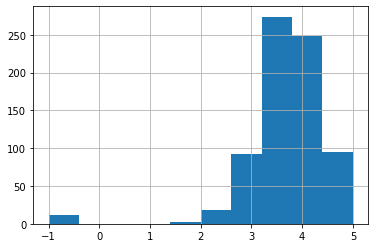

In [85]:
#data visualization on the ratings column
data.Rating.hist()

<AxesSubplot:>

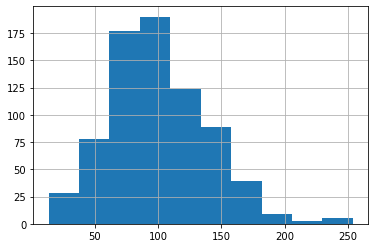

In [86]:
#data visualizarion on the average salary column
data.average_salary.hist()

<AxesSubplot:>

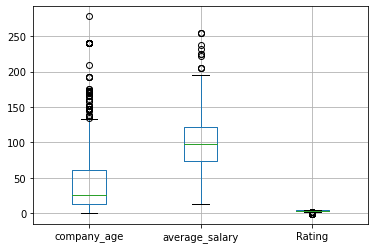

In [87]:
#data visualization on some columns to discover the level of correlation among columns
data.boxplot(column=['company_age', 'average_salary', 'Rating'])

<AxesSubplot:>

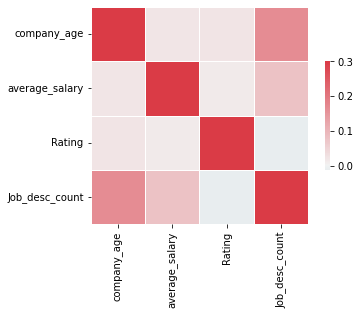

In [88]:
#correlation analysis on company_age, average_salary, ratings and job_desc_count columns using the heatmap visualization tool
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlation_data = data[['company_age', 'average_salary', 'Rating', 'Job_desc_count']].corr()
sns.heatmap(correlation_data, vmax=.3, center=0, cmap=cmap, square=True, linewidth=.5, cbar_kws={'shrink': .5})

In [89]:
data.columns

Index(['Unnamed: 0', 'Job_title', 'Salary_estimate', 'Job_Description',
       'Rating', 'company_name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'same_state', 'python',
       'SQL', 'Spark', 'AWS', 'POWERBI', 'Excel', 'R_studio', 'matlab',
       'Tableau', 'job_simplified', 'Job_level', 'Job_desc_count'],
      dtype='object')

In [90]:
pd.pivot_table(data, values=["average_salary", "max_salary", "min_salary"], index=["job_simplified", "Job_level"]).sort_values('average_salary', ascending=False)
# data.head()
# data['Job_level'][:30]

average_salary  max_salary  min_salary
job_simplified Job_level                                        
director       na             168.607143  208.214286  129.000000
mle            senior         142.071429  184.142857  100.000000
data scientist senior         138.956522  169.956522  107.956522
data engineer  senior         124.689189  156.378378   93.000000
mle            na             119.133333  152.400000   85.866667
NaN            senior         109.061404  141.122807   77.000000
data scientist na             107.043011  133.096774   80.989247
               jr             106.500000  132.000000   81.000000
data engineer  na              96.701220  124.853659   68.548780
manager        na              84.022727  109.954545   58.090909
Data analyst   senior          79.092593  102.666667   57.518519
NaN            na              73.988189  101.527559   55.472441
Data analyst   na              61.155405   78.972973   43.337838
               jr              56.500000   76.000000   37.000000

In [91]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [92]:
#Data analysis to gain insights on the job state with the highest average salary
pd.pivot_table(data, index=['job_state'], values='average_salary').sort_values('average_salary', ascending=False)[:10]

,average_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [93]:
#performing EDA on categorical columns
# data.head()
categorical_data = data[['Location', 'Headquarters', 'Size', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'SQL', 'Spark', 'AWS', 'POWERBI', 'Excel', 'R_studio', 'matlab',
       'Tableau', 'job_simplified', 'Job_level']]

Categorical data: Location with total count: 17


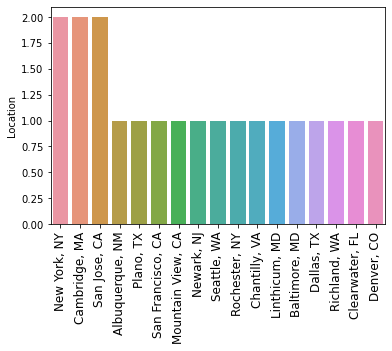

Categorical data: Headquarters with total count: 16


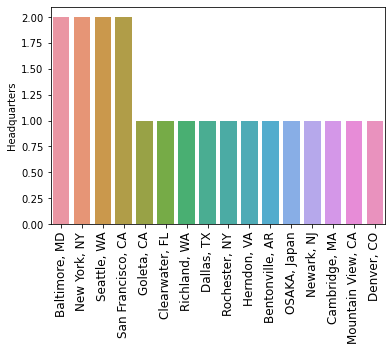

Categorical data: Size with total count: 6


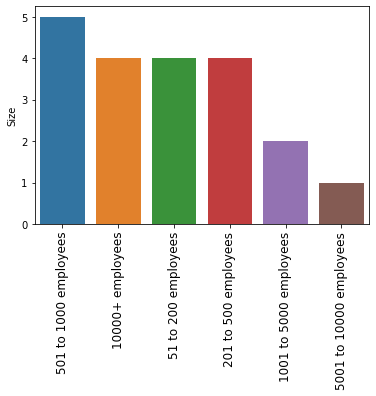

Categorical data: Type_of_ownership with total count: 7


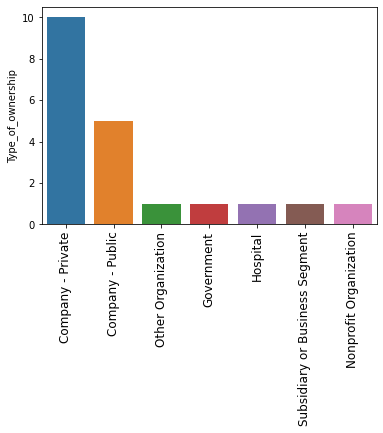

Categorical data: Industry with total count: 16


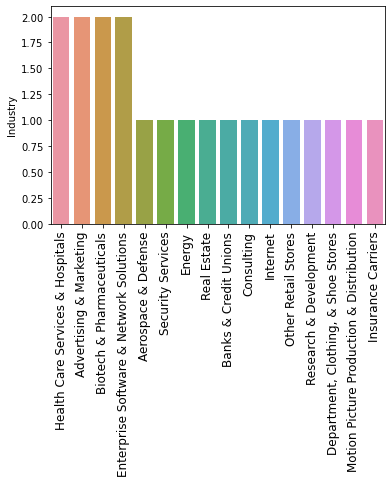

Categorical data: Sector with total count: 11


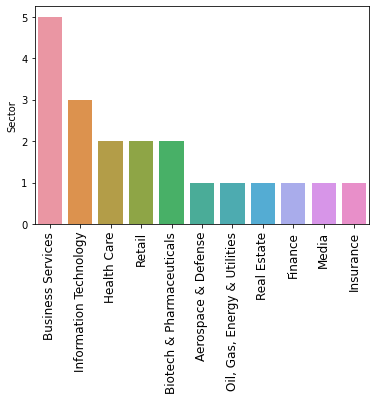

Categorical data: Revenue with total count: 9


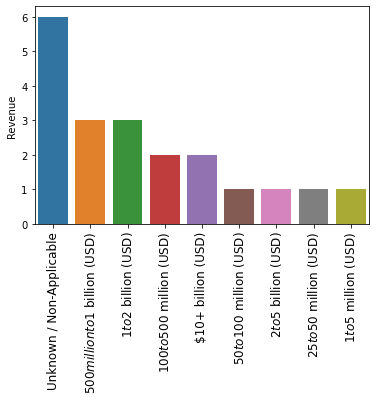

Categorical data: job_state with total count: 11


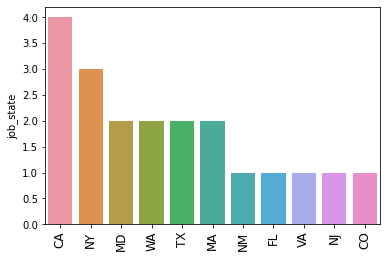

Categorical data: SQL with total count: 2


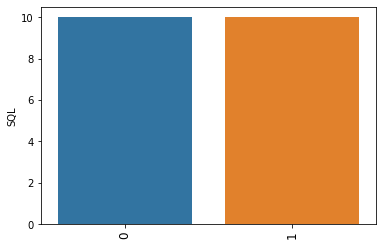

Categorical data: Spark with total count: 2


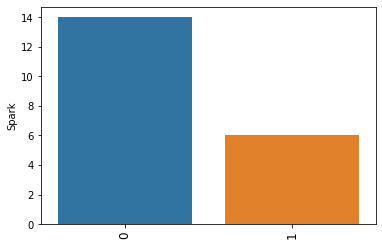

Categorical data: AWS with total count: 2


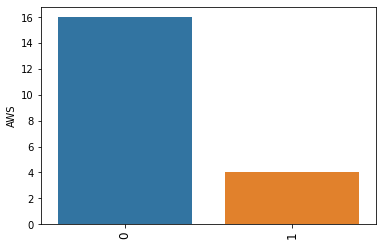

Categorical data: POWERBI with total count: 2


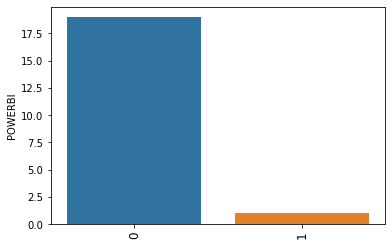

Categorical data: Excel with total count: 2


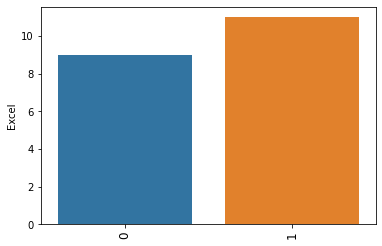

Categorical data: R_studio with total count: 1


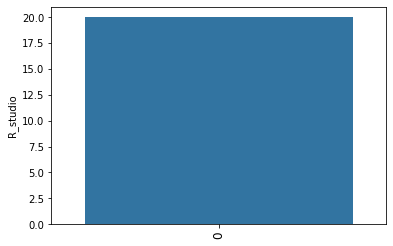

Categorical data: matlab with total count: 2


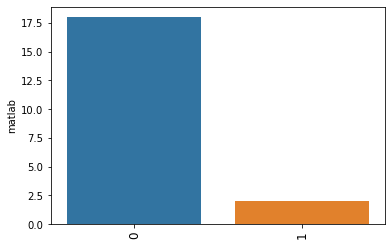

Categorical data: Tableau with total count: 2


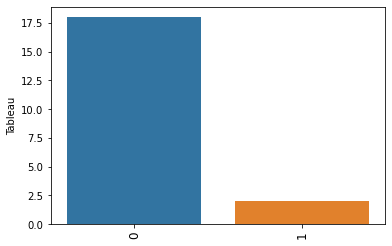

Categorical data: job_simplified with total count: 4


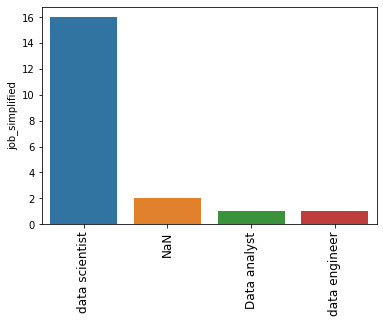

Categorical data: Job_level with total count: 1


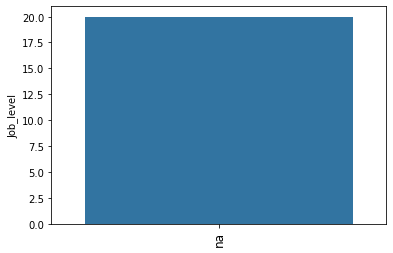

In [94]:
for i in categorical_data.columns:
    x_axis = categorical_data[i][:20].value_counts()
    print("Categorical data: {} with total count: {}".format(i, len(x_axis)))
    chart = sns.barplot(x=x_axis.index, y=x_axis)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=12)
    
    plt.show()

In [95]:
data.columns
df_pivots = data[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python', 'SQL', 'Spark', 'AWS', 'POWERBI', 'Excel', 'R_studio', 'matlab', 'Tableau', 'average_salary']]


In [96]:
for i in df_pivots.columns:
    print('###########')
#     print(i)
    print(pd.pivot_table(df_pivots, index=i, values='average_salary').sort_values('average_salary', ascending=False))

###########
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
###########
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      

ValueError: Grouper for 'average_salary' not 1-dimensional

In [97]:
mean_value = np.mean(data['Rating'])
mean_value = '{:.1f}'.format(mean_value)
mean_value = float(mean_value)
mean_value

3.6

In [98]:
#replacing the -1 values in the ratings column with the mean of ratings
data['Rating'] = data['Rating'].replace(-1, mean_value)
data[data['Rating'] == -1]
data.Rating

0      3.8
1      3.4
2      4.8
3      3.8
4      2.9
5      3.4
6      4.1
7      3.8
8      3.3
9      4.6
10     3.5
11     4.1
12     3.2
13     4.1
14     3.7
15     3.6
16     3.9
17     4.3
18     4.2
19     4.0
20     3.2
21     3.9
22     3.8
23     4.3
24     4.0
25     4.0
26     3.5
27     3.7
28     4.0
29     4.8
30     3.8
31     3.6
32     3.8
33     3.8
34     4.7
35     4.2
36     3.5
37     4.7
38     3.5
39     3.5
40     4.2
41     3.6
42     4.2
43     3.4
44     4.3
45     5.0
46     3.7
47     3.1
48     4.7
49     3.7
50     3.8
51     3.3
52     4.6
53     3.7
54     3.7
55     3.5
56     4.1
57     4.7
58     4.1
59     3.4
60     4.4
61     4.3
62     3.8
63     3.8
64     3.8
65     2.8
66     4.7
67     3.1
68     3.2
69     4.0
70     4.4
71     3.6
72     2.7
73     3.9
74     3.1
75     4.0
76     4.3
77     1.9
78     3.3
79     4.4
80     3.9
81     4.7
82     4.5
83     4.3
84     4.0
85     4.4
86     3.2
87     3.8
88     4.2
89     4.5
90     3.5